### First, we are going to import our libraries, read in the data set, and preview the data to get and idea of the data quality

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import norm
import math

In [2]:
#Read the dataset
df = pd.read_csv('dataset.csv')

In [3]:
#Preview dataframe
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


### Next we are going to perform cleaning, so we will check for any null values

In [4]:
#Checking for null values
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

### As we can see there aren't any null values. Overall the data appears to be in good shape, and further cleaning is not really needed.

### Let's continue on and begin our Exploratory Analysis
### Here we are just looking at a sum of male and female players

In [5]:
df['Gender'].value_counts()


Male      23959
Female    16075
Name: Gender, dtype: int64

### And this is just showing it as a ratio. So we see Male players outnumber Female players by almost 20 percent.

In [6]:
male_players = df['Gender'].value_counts()[0]
female_players = df['Gender'].value_counts()[1]
total_players = df.shape[0]
percent_male_players = ((male_players / total_players) * 100).round(2)
percent_female_players = ((female_players / total_players) * 100).round(2)

print("Percentage of Male Players: ", percent_male_players)
print("Percentage of Female Players: ", percent_female_players)

Percentage of Male Players:  59.85
Percentage of Female Players:  40.15


### Next we are going to perform a correlation test. In the cell below, we see a rating for each column comparing it to another. Here's how we interpret the results. Anything that is a 1 is just the column compared with itself. For the rest, the closer to 1 the numbers are, the stronger a column is related to another. Unfortunately, as we can see, the rest of the numbers are very small, so we cannot make any strong correlations between any of the data.

In [7]:
#Correlation analysis
print(df.corr(numeric_only=True))

                           PlayerID       Age  PlayTimeHours  InGamePurchases  \
PlayerID                   1.000000 -0.003044       0.000923         0.002321   
Age                       -0.003044  1.000000       0.002462        -0.000186   
PlayTimeHours              0.000923  0.002462       1.000000        -0.006067   
InGamePurchases            0.002321 -0.000186      -0.006067         1.000000   
SessionsPerWeek           -0.005944  0.008777      -0.003655         0.005132   
AvgSessionDurationMinutes -0.001801 -0.002269      -0.001925        -0.003059   
PlayerLevel               -0.001769  0.001353      -0.005152         0.006524   
AchievementsUnlocked       0.003190 -0.001100       0.003913         0.000098   

                           SessionsPerWeek  AvgSessionDurationMinutes  \
PlayerID                         -0.005944                  -0.001801   
Age                               0.008777                  -0.002269   
PlayTimeHours                    -0.003655         

### Next we are going to split the data into two subsets: Purchases and Non-Purchases, so further comparative analysis can be done.

In [8]:
df_nop = df[df['InGamePurchases'] == 0] #No purchases
df_p = df[df['InGamePurchases'] == 1] #Purchases

#### Purchases

In [10]:
df_p.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
11,9011,36,Female,Asia,Simulation,5.535981,1,Easy,16,124,62,31,High
12,9012,16,Male,USA,Sports,18.776234,1,Easy,9,18,52,32,High
31,9031,39,Male,USA,Sports,3.374946,1,Easy,5,70,50,11,Medium
40,9040,49,Female,Europe,Strategy,13.714087,1,Medium,15,43,93,29,Medium


#### No Purchases

In [9]:
df_nop.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low


### Here we see a grouping of the data by genres for each purchase. This is helpful because it shows us what types of games are among the most popular and are more likely to sell. So we see Strategy is the top selling Genre.

In [11]:
#Counts of purchases by Genre
genre_counts = df_p.groupby('GameGenre').size()
print(genre_counts)

GameGenre
Action        1553
RPG           1576
Simulation    1610
Sports        1622
Strategy      1680
dtype: int64


### Next we are looking at player engagement levels. The first is overall player engagement. We see majority fall into the Medium category. The second is showing player engagement of players with no purchases. And last we see player engagement of players with purchases. The three subsets are roughly the same percentages with Medium engagement as the most common.

In [12]:
#Distribution of EngagementLevel
print("Player Engagement Percentage:")
print(df['EngagementLevel'].value_counts(normalize=True))
print("\n")
print("Engagement Percentage of Players with no purchases:")
print(df_nop['EngagementLevel'].value_counts(normalize=True))
print("\n")
print("Engagement Percentage of Players with purchases:")
print(df_p['EngagementLevel'].value_counts(normalize=True))


Player Engagement Percentage:
Medium    0.483939
High      0.258181
Low       0.257881
Name: EngagementLevel, dtype: float64


Engagement Percentage of Players with no purchases:
Medium    0.484606
Low       0.259025
High      0.256369
Name: EngagementLevel, dtype: float64


Engagement Percentage of Players with purchases:
Medium    0.481283
High      0.265390
Low       0.253327
Name: EngagementLevel, dtype: float64


### And here we see a bar chart showing the same engagement levels

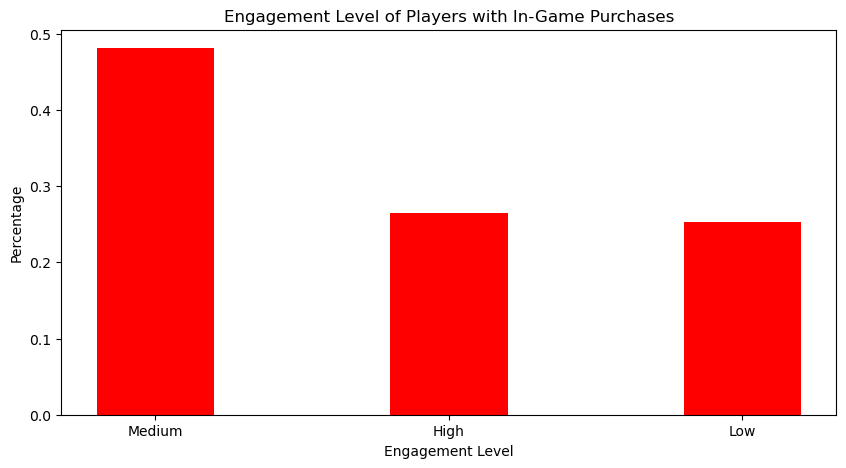

In [13]:
#Plotting Player Engagement Levels
fig = plt.figure(figsize = (10, 5))
x = df_p['EngagementLevel'].unique()
y = df_p['EngagementLevel'].value_counts(normalize=True)
# creating the bar plot
plt.bar(x, y, color ='red', 
        width = 0.4)

plt.xlabel("Engagement Level")
plt.ylabel("Percentage")
plt.title("Engagement Level of Players with In-Game Purchases")
plt.show()

### Next we are going to look at several Player Statistics, the first is from players without purchases.

In [14]:
#lets look at some more statistics between the two data sets and see if there is a difference
df_nop_avg_playtime = df_nop['PlayTimeHours'].mean()
df_nop_max_playtime = df_nop['PlayTimeHours'].max()
df_nop_snperweek = df_nop['SessionsPerWeek'].mean()
df_nop_avg_playerlvl = df_nop['PlayerLevel'].mean()
df_nop_max_playerlvl = df_nop['PlayerLevel'].max()
df_nop_gender_counts = df_nop['Gender'].value_counts()
df_nop_englvl = df_nop['EngagementLevel'].value_counts()

#Players without Purchases
print("Players without Purchases Stats")
print("Average Playtime: ", df_nop_avg_playtime)
print("Maximum Playtime: ", df_nop_max_playtime)
print("Average Sessions Per Week: ", df_nop_snperweek)
print("Average Player Level: ", df_nop_avg_playerlvl)
print("Maximum Level: ", df_nop_max_playerlvl)
print("Gender Counts:\n", df_nop_gender_counts)

Players without Purchases Stats
Average Playtime:  12.045395068315253
Maximum Playtime:  23.999591633580454
Average Sessions Per Week:  9.456943706435784
Average Player Level:  49.56206045072359
Maximum Level:  99
Gender Counts:
 Male      19098
Female    12895
Name: Gender, dtype: int64


### Here we see a histogram graph showing the distribution of those playtimes, with the marker showing the average

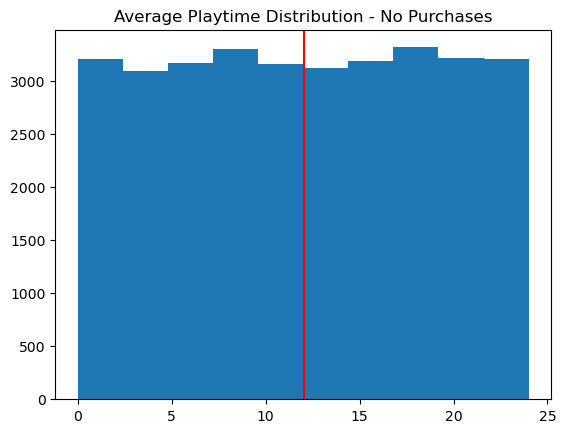

In [15]:
#Distribution of Playtime with marker showing average of players with no purchases
p_diffs = np.array(df_nop.PlayTimeHours)
plt.title("Average Playtime Distribution - No Purchases")
plt.hist(p_diffs);
plt.axvline(df_nop_avg_playtime, c='red');

### And a standard deviation of 6.9

In [16]:
#Standard Deviation of Playtime Hours for players with no purchases
df_nop_std_dev = statistics.stdev(df_nop.PlayTimeHours)
df_nop_std_dev

6.917055625425631

### Now we'll look at those same player statistics, but from the other subset. So, players _with_ purchases.

In [17]:
#Players with Purchases
df_p_avg_playtime = df_p['PlayTimeHours'].mean().round(2)
df_p_max_playtime = df_p['PlayTimeHours'].max()
df_p_avg_snperweek = df_p['SessionsPerWeek'].mean().round(2)
df_p_avg_playerlvl = df_p['PlayerLevel'].mean().round(2)
df_p_max_playerlvl = df_p['PlayerLevel'].max()
df_p_gender_counts = df_p['Gender'].value_counts()
df_p_avg_englvl = df_p['EngagementLevel'].value_counts().mean().round(2)


print("Players with Purchases Stats")
print("Average Playtime: ", df_p_avg_playtime)
print("Maximum Playtime: ", df_p_max_playtime)
print("Average Sessions Per Week: ", df_p_avg_snperweek)
print("Average Player Level: ", df_p_avg_playerlvl)
print("Average Engagement Level: ", df_p_avg_englvl)
print("Maximum Level: ", df_p_max_playerlvl)
print("Gender Counts:\n", df_p_gender_counts)

Players with Purchases Stats
Average Playtime:  11.94
Maximum Playtime:  23.997244733226548
Average Sessions Per Week:  9.53
Average Player Level:  50.03
Average Engagement Level:  2680.33
Maximum Level:  99
Gender Counts:
 Male      4861
Female    3180
Name: Gender, dtype: int64


### The same histogram for this subset, with a marker showing the average, which is almost the same as the other subset.

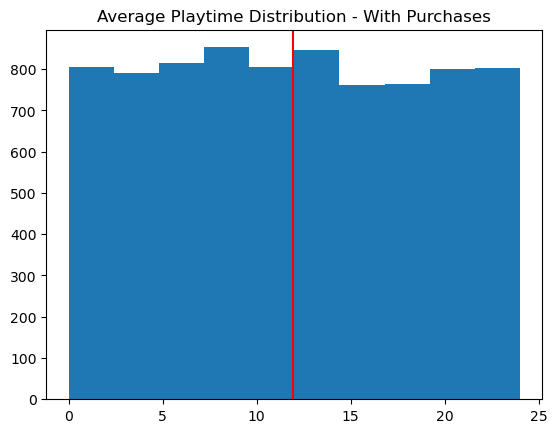

In [18]:
#Distribution of Playtime with marker showing average of players with purchases
p_diffs = np.array(df_p.PlayTimeHours)
plt.title("Average Playtime Distribution - With Purchases")
plt.hist(p_diffs);
plt.axvline(df_p_avg_playtime, c='red');

### And here we see a similar standard deviation as well. So, there doesn't seem to be much difference between players with purchases and players without purchases, at least in terms of engagement levels.

In [19]:
#Standard Deviation of Playtime Hours for players with purchases
df_p_std_dev = statistics.stdev(df_p.PlayTimeHours)
df_p_std_dev

6.9048053314250675

### Now we will look at purchases by gender, to see if one is more likely to make purchases than the other (or probability analysis).

In [20]:
#Purchases by Gender
male_players = df[df['Gender'] == 'Male']
male_players = male_players.shape[0]

male_purchases = df_p[df_p['Gender'] == 'Male']
male_purchases = male_purchases['InGamePurchases'].sum()

female_players = df[df['Gender'] == 'Female']
female_players = female_players.shape[0]

female_purchases = df_p[df_p['Gender'] == 'Female']
female_purchases = female_purchases['InGamePurchases'].sum()

male_player_pur_prob = (male_purchases / male_players) * 100
female_player_pur_prob = (female_purchases / female_players) * 100

print("Male Players: ", male_players)
print("Male Purchases: ", male_purchases)
print("\n")
print("Female Players: ", female_players)
print("Female Purchases: ", female_purchases)
print("\n")
print("Probability of Male Player Purchases: ", male_player_pur_prob.round(2))
print("Probability of Female Player Purchases: ", female_player_pur_prob.round(2))

prob_list = [male_player_pur_prob.round(2), female_player_pur_prob.round(2)]
gender_list = ["Male", "Female"]

Male Players:  23959
Male Purchases:  4861


Female Players:  16075
Female Purchases:  3180


Probability of Male Player Purchases:  20.29
Probability of Female Player Purchases:  19.78


### So, we see about the same probability, even though males outnumber females, the probability of purchase between each gender is still about that same. And we can see in the below bar chart as well.

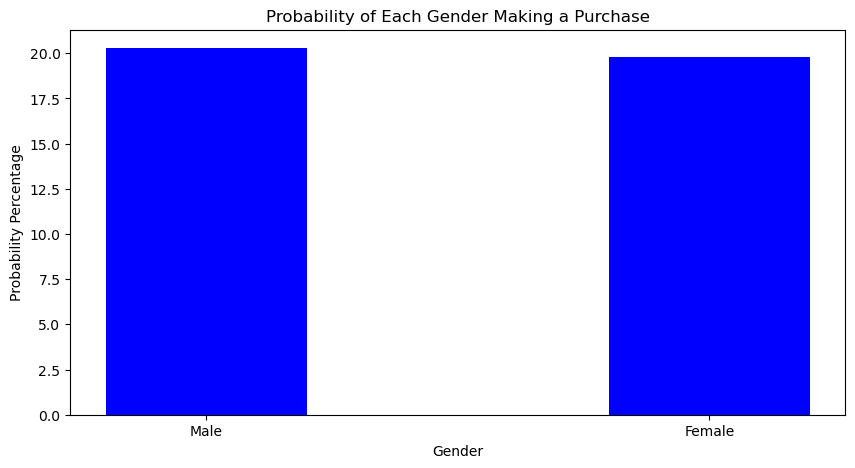

In [21]:
#Plotting Probability
fig = plt.figure(figsize = (10, 5))
x = gender_list
y = prob_list
# creating the bar plot
plt.bar(x, y, color ='blue', 
        width = 0.4)

plt.xlabel("Gender")
plt.ylabel("Probability Percentage")
plt.title("Probability of Each Gender Making a Purchase")
plt.show()

### Next we look at Players' play time by Age to see if any age groups play more or less than the others

In [22]:
#Averages of Players with purchases grouped by Age
df_p_grp = df[df['InGamePurchases'] == 1]
df_p_grp = df_p_grp.groupby('Age').mean(numeric_only=True)
df_p_grp = df_p_grp[['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes']]
df_p_grp

,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes
Age,,,
15,11.511604,9.753363,91.573991
16,12.105001,9.375527,94.088608
17,11.316841,8.695279,95.708155
18,11.682332,9.389140,92.565611
19,11.690240,8.979757,98.878543
20,11.307270,8.642105,95.194737
21,11.700382,8.906383,94.208511
22,12.143351,9.672986,91.090047
23,12.237431,9.255507,94.048458


### That's a lot of data, so that was put into the bar chart below so we can better visualize it.

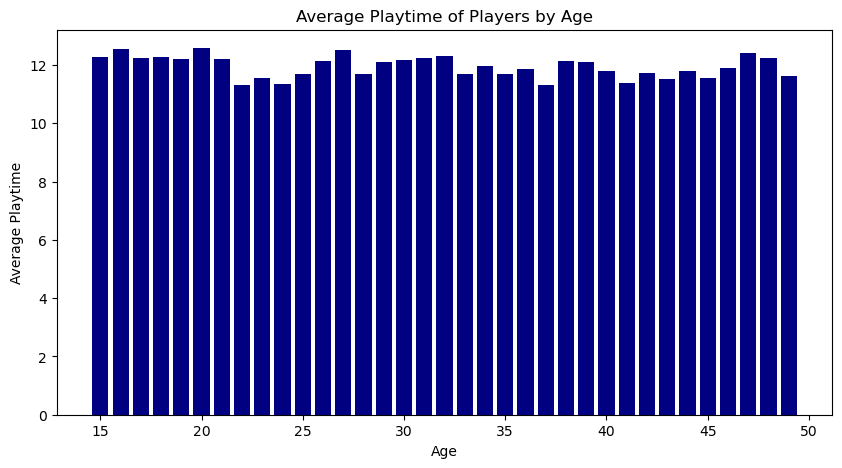

In [23]:
#Plotting Average Playtime of Players by Age
fig = plt.figure(figsize = (10, 5))
x = df['Age'].unique()
y = df_p_grp['PlayTimeHours']
# creating the bar plot
plt.bar(x, y, color ='navy')

plt.xlabel("Age")
plt.ylabel("Average Playtime")
plt.title("Average Playtime of Players by Age")
plt.show()

### Finally, we will take a look at Location Analysis, which will show us from which countries players made the most purchases. We see that in the horizontal bar chart below, USA and Europe make the most purchases. 

<Axes: ylabel='Location'>

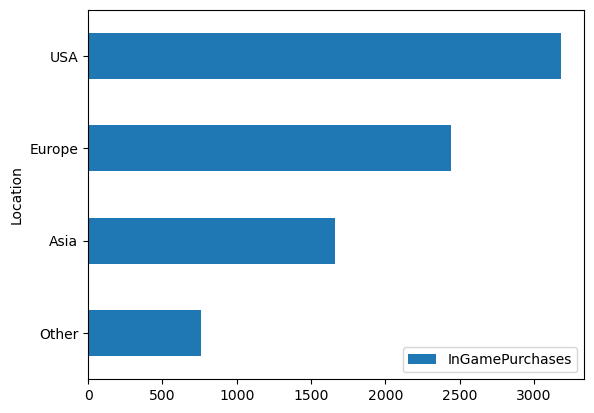

In [24]:
#Data is grouped by Location
df_p_grp_loc = df_p.groupby("Location").sum(numeric_only=True).reset_index()
df_p_grp_loc = df_p_grp_loc[['Location','InGamePurchases']]
df_p_grp_loc.sort_values(['InGamePurchases'], ascending=[True], inplace=True)
df_p_grp_loc.plot(kind='barh', x='Location', y='InGamePurchases')

### Next we will look at Hypothesis testing. The first test is looking at the original Hypothesis. Finding a correlation between PlayTimeHours and InGamePurchases, but there was no correlation there.

In [25]:
stat, p_val= stats.pearsonr(df_p['PlayTimeHours'], df_p['InGamePurchases'])
print("p value:%.4f" % p_val)
print("correlation:%.4f" % stat)

p value:nan
correlation:nan


C:\Users\gmar8\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


### So then we looked at PlayTimeHours with Age just to see, which gave us values that are not significant.

In [26]:
stat, p_val= stats.pearsonr(df['PlayTimeHours'], df['Age'])
print("p value:%.4f" % p_val)
print("correlation:%.4f" % stat)

p value:0.6223
correlation:0.0025


### At this point, we have completed the analysis and will go over the report below

### Report

__The Hypothesis:__

InGamePurchases increases as AveragePlayTime or EngagementLevel increases (or positive correlation).

__The Conclusion:__ 

Based on these results, we can conclude that there is no positive correlation between InGamePurchases and AveragePlayTime or EngagementLevel. Nor is there strong evidence to prove that higher engagement levels are associated with more in game purchases. 

__The Alternate Hypothesis:__ 

Male players are more likely to make purchases than Female players.

__The Concluson:__ 

There was not a significant difference in probability between gender purchases. There was a signifcantly higher number of male players than female players. However, the probability of purchase was nearly identical between the two genders, with only around a half (0.51%) difference in favor of male purchase probability. 

__My Closing Thoughts:__

After thorough analysis, there is little variance in the data and therefore drawing meaningful insights has proven to be a challenge. For example, correlation analysis showed a weak score across all data points. Furthermore, probability was nearly identical between male and female players in terms of making a purchase. Age was also looked at but there was still only small variance.

### From these results, my recommendations would be simply to focus on developing strategy games for players in USA and Europe regardless of age, gender, engagement levels or playtime averages.

#### Additional insights gained

_Probability of Purchase:_ 20%

_Country with Most Purchases:_ USA

_Best-Selling Genre:_ Strategy

_Most Common Engagement Level:_ Medium

_Percentage of Male Players:_ 59.85%

_Percentage of Female Players:_ 40.15%


### This concludes my analysis report. Thank you.